In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

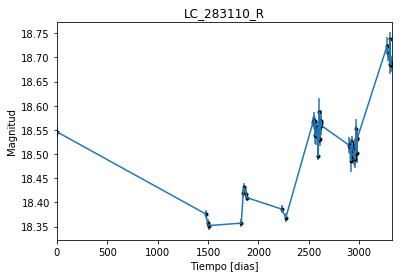

In [2]:
data = np.genfromtxt('LC_283110_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_283110_R')
plt.savefig("LC_283110_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

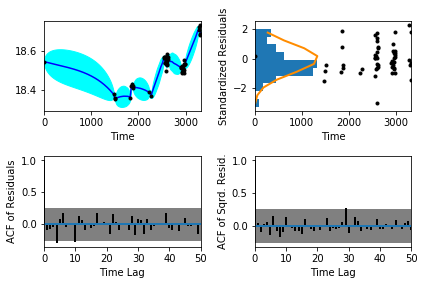

In [5]:
sample.assess_fit()

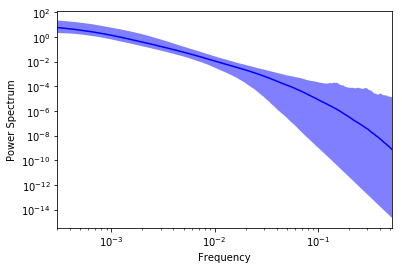

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

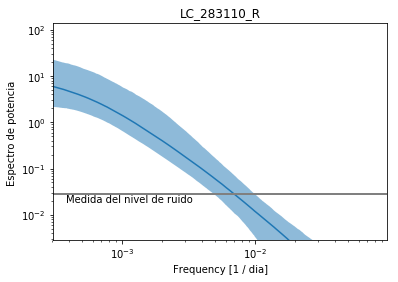

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_283110_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_283110_R')

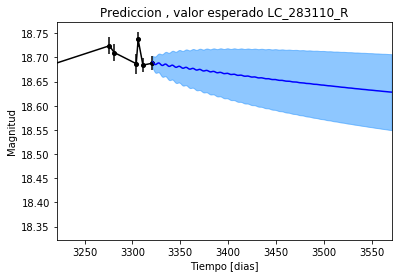

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_283110_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_283110_R')

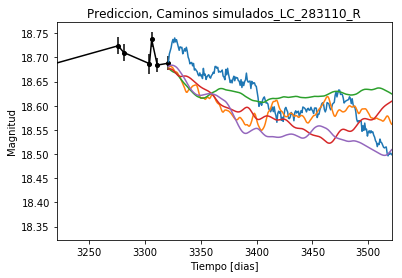

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_283110_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


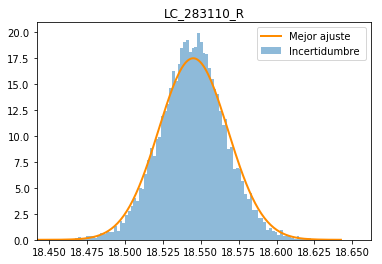

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_283110_R')
plt.savefig("Mejor_ajuste_LC_283110_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_283110_R')

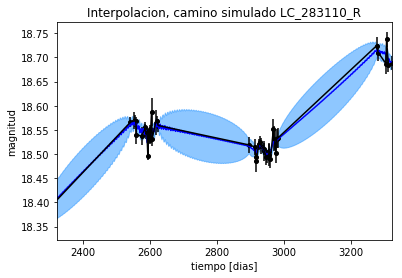

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_283110_R')

Text(0.5,1,'Interpolacion, camino simulado LC_283110_R')

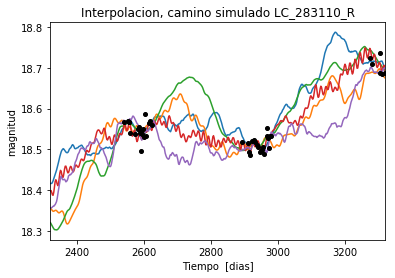

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_283110_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 368.344806674
Median: 0.0266402417348
Standard deviation: 0.210124483394
68% credibility interval: [ 0.00212959  0.26512786]
95% credibility interval: [  4.08112258e-04   7.86339605e-01]
99% credibility interval: [  3.15591592e-04   9.76692682e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 286.363589102
Median: 0.0079321292963
Standard deviation: 0.117221098183
68% credibility interval: [ 0.00053054  0.07282343]
95% credibility interval: [  3.15591592e-04   4.59708363e-01]
99% credibility interval: [  3.04922560e-04   7.16163695e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 286.337419295
Median: 0.0698498483342
S

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1036.8204733
Median: 144.766432299
Standard deviation: 1.91585963786
68% credibility interval: [ 142.64349884  146.19557002]
95% credibility interval: [ 139.81731847  147.20845797]
99% credibility interval: [ 137.63659263  147.67900055]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 326.156565291
Median: 1.41109696621
Standard deviation: 2.70496938537
68% credibility interval: [ 0.16259641  5.47134517]
95% credibility interval: [ 0.03509821  8.83006981]
99% credibility interval: [  0.01520866  12.02343294]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 289.780942143
Median: 2.88303708027
Standard deviation: 12.3859274007
68% credibility interval: [  0.2874755   18.33102297]
95% credibility interval: [  1.49863226e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1069.97301344
Median: 2.69301330322e-47
Standard deviation: 2.43236186267e+38
68% credibility interval: [  5.56285045e-87   9.58716280e-11]
95% credibility interval: [  2.22861962e-109   3.80793825e-001]
99% credibility interval: [  4.24830243e-171   2.00973806e+037]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1565.09742884
Median: 18.5055799535
Standard deviation: 0.0599140152731
68% credibility interval: [ 18.45052822  18.56147642]
95% credibility interval: [ 18.38746059  18.62145434]
99% credibility interval: [ 18.32670477  18.6808517 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 375.929457751
Median: 0.122679750411
Standard deviation: 0.285998079256
68% credibility interval: [ 0.         0.5702842]
95% credibility interval: [ 0.          0.94950033]
99% credibility interval: [ 0.          1.02009752]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 375.929457751
Median: 0.122679750411
Standard deviation: 0.285998079256
68% credibility interval: [ 0.         0.5702842]
95% credibility interval: [ 0.          0.94950033]
99% credibility interval: [ 0.          1.02009752]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2790.04733992
Median: 0.0
Standard deviation: 0.000171974099965
68% credibil

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1036.8204733
Median: 144.766432299
Standard deviation: 1.91585963786
68% credibility interval: [ 142.64349884  146.19557002]
95% credibility interval: [ 139.81731847  147.20845797]
99% credibility interval: [ 137.63659263  147.67900055]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 961.95559898
Median: 0.0121496024309
Standard deviation: 0.0124950736685
68% credibility interval: [ 0.0077895   0.02104427]
95% credibility interval: [ 0.00547433  0.04331202]
99% credibility interval: [ 0.0042768   0.07754132]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 558.712422891
Median: 1.0816700902
Standard deviation: 0.198822674932
68% credibility interval: [ 0.90820295  1.29464188]
95% credibility interval: [ 0.75159004  1.54292684]
99% credibility interval: [ 0.68095767  1.70019531]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 254.243962597
Median: 0.0030870889246
Standard deviation: 0.18169457467
68% credibility interval: [ 0.00012473  0.06665464]
95% credibility interval: [  1.07531255e-06   5.67909253e-01]
99% credibility interval: [  6.97926546e-41   1.38004049e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 368.344806674
Median: (-0.167385575448-0.923386746358j)
Standard deviation: 2.229842181
68% credibility interval: [-1.66584745+0.j         -0.01338060-0.45759895j]
95% credibility interval: [ -4.94071745e+00-6.52795182j  -2.56424494e-03-1.86286643j]
99% credibility interval: [ -6.13674111e+00-3.07956501j  -1.98292045e-03-0.88833015j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 286.363589102
Median: (-0.0498390382492+0.0761082830683j)
Standard deviation: 1.94206018323
68% credibility interval: [-0.45756313+0.j         -0.00333345+0.63078459j]
95% credibility interval: [ -2.88843283e+00+1.81426075j  -1.98292045e-03+0.88833015j]
99% credibility interval: [ -4.49978920e+00+3.78392972j  -1.91588495e-03+1.8224167j ]
Post